# Librerías necesarias
# Conección con la API


In [1]:

# pip install pandas
# pip install sodapy
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sodapy import Socrata


client = Socrata("healthdata.gov", None)

results = client.get("g62h-syeh", limit=48000)
'''
Convertir archivo json en  DataFrame
 '''
results_df = pd.DataFrame.from_records(results)
results_df= results_df.sort_values('date',ascending=False)
results_df['date']=results_df['date'].astype('datetime64')

In [3]:
results_df.to_csv('PI 2.csv',index=False)

In [2]:
dfi=results_df

# ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?



In [3]:
''''
Nuevo dataframe para resolver el ejercicio
'''
df1=results_df[['date','state' ,'total_pediatric_patients_hospitalized_confirmed_covid','total_adult_patients_hospitalized_confirmed_covid','deaths_covid']]

In [4]:
'''
Muetro dataframe
'''
df1

,date,state,total_pediatric_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,deaths_covid
36688,2022-08-11,TN,25,852,6
42364,2022-08-11,AR,14,374,1
45040,2022-08-11,NC,24,1270,14
42495,2022-08-11,RI,0,90,0
38208,2022-08-11,IN,22,694,3
...,...,...,...,...,...
6638,2020-01-01,AL,NaN,NaN,NaN
16102,2020-01-01,PR,NaN,NaN,0
18463,2020-01-01,IN,NaN,NaN,0
3987,2020-01-01,HI,NaN,NaN,0


In [6]:
df1=df1[(df1['date']<='2020-06-30')]

df1.fillna(0,inplace=True)

df1['total_pediatric_patients_hospitalized_confirmed_covid']=df1['total_pediatric_patients_hospitalized_confirmed_covid'].astype('int')
df1['total_adult_patients_hospitalized_confirmed_covid']=df1['total_adult_patients_hospitalized_confirmed_covid'].astype('int')
df1['total_pacientes']=df1['total_pediatric_patients_hospitalized_confirmed_covid']+df1['total_adult_patients_hospitalized_confirmed_covid']

df1=df1[df1['total_pacientes']!=0]
df1=df1.sort_values('date',ascending=False)

In [7]:
df1

,date,state,total_pediatric_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,deaths_covid,total_pacientes
7993,2020-06-30,NV,0,138,2,138
9555,2020-06-30,NY,0,1,10,1
1625,2020-06-30,IA,0,35,1,35
8600,2020-06-30,OK,0,9,2,9
6064,2020-06-30,CA,0,113,92,113
...,...,...,...,...,...,...
19912,2020-01-06,NV,9,1792,29,1801
20838,2020-01-05,NV,9,1792,29,1801
19703,2020-01-04,NV,9,1792,29,1801
18608,2020-01-03,NV,9,1792,29,1801


In [8]:
df1=df1.groupby('state').sum()
df1

,total_pediatric_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pacientes
state,,,
AZ,0,5177,5177
CA,0,36134,36134
IA,0,3174,3174
LA,0,40452,40452
MS,0,14,14
NE,0,1826,1826
NV,45,20089,20134
NY,0,87,87
OK,0,1316,1316


In [10]:
final=df1.sort_values('total_pacientes',ascending=False)
final

,total_pediatric_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid,total_pacientes
state,,,
LA,0,40452,40452
CA,0,36134,36134
NV,45,20089,20134
AZ,0,5177,5177
IA,0,3174,3174
NE,0,1826,1826
OK,0,1316,1316
PR,30,745,775
NY,0,87,87


 #  Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:


In [11]:
df2=results_df[['date','state' ,'inpatient_beds_used_covid','deaths_covid']]
df2

,date,state,inpatient_beds_used_covid,deaths_covid
36688,2022-08-11,TN,921,6
42364,2022-08-11,AR,467,1
45040,2022-08-11,NC,2141,14
42495,2022-08-11,RI,93,0
38208,2022-08-11,IN,825,3
...,...,...,...,...
6638,2020-01-01,AL,NaN,NaN
16102,2020-01-01,PR,0,0
18463,2020-01-01,IN,0,0
3987,2020-01-01,HI,0,0


In [13]:
'''
Tomo los 6 meses para calcular
'''
df2 = df2[(df2['date'] <= '2021-03-01')]
df2 = df2[(df2['date'] >= '2020-03-08')]
'''
Filtro por New York
'''
df2 = df2[df2['state'] == 'NY']

'''
Convierto a tipo numérico el tipo de dato
'''
df2['inpatient_beds_used_covid'] = df2['inpatient_beds_used_covid'].astype('int')
''''
Descarto la columana Date
'''
final = df2.drop('date',axis=1)
'''
Agrupo por Estado y lo sumo
'''
final = final.groupby('state').sum()
''''
Muestro el Dataframe de resultado
'''
final



,inpatient_beds_used_covid
state,
NY,1716957


In [14]:
df2['inpatient_beds_used_covid'].max()

14126

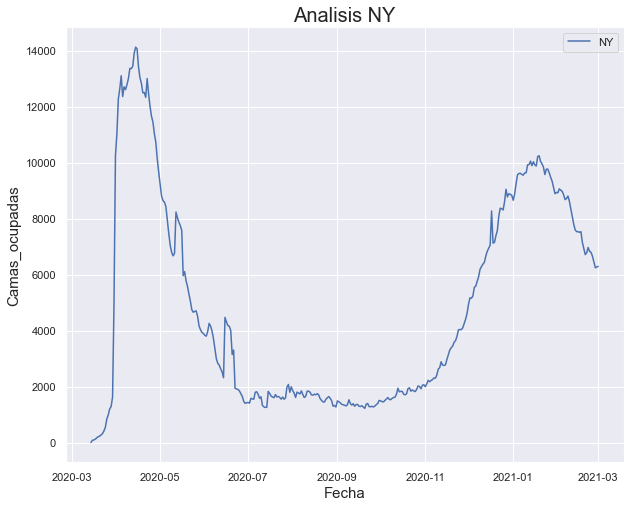

In [15]:
sns.set()
fig = plt.figure()
ax = plt.axes()
y = df2['inpatient_beds_used_covid']
x = df2['date']

plt.plot(x,y)
plt.xlabel('Fecha',fontsize=15)
plt.ylabel('Camas_ocupadas',fontsize=15)
plt.title('Analisis NY',fontsize=20)
plt.gcf().set_size_inches(10, 8)
plt.legend(labels=['NY'])

plt.show()

 # Intervalos de crecimiento y decrecimiento
# Puntos críticos (mínimos y máximos)

In [16]:
serie = df2[df2['date'] < '2020-09-01']
index = serie['inpatient_beds_used_covid'].argmin()
min1 = str(serie['date'].iloc[index]).split()
index = serie['inpatient_beds_used_covid'].argmax()
max1 = str(serie['date'].iloc[index]).split()

In [17]:
serie = df2[df2['date'] > '2020-05-01']
serie = serie[serie['date'] < '2021-02-01']
index = serie['inpatient_beds_used_covid'].argmin()
min2 = str(serie['date'].iloc[index]).split()
index = serie['inpatient_beds_used_covid'].argmax()
max2 = str(serie['date'].iloc[index]).split()

In [18]:
serie = df2[df2['date'] > '2021-02-01']
index = serie['inpatient_beds_used_covid'].argmin()
min3 = str(serie['date'].iloc[index]).split()

In [19]:
intervalos = {'inicio': [min1[0], max1[0], min2[0], max2[0]], 'final':[max1[0], min2[0],max2[0], min3[0]], 'variacion':['Crece', 'Decrece','Crece', 'Decrece']}

In [20]:
intervalos = pd.DataFrame(intervalos)
intervalos

,inicio,final,variacion
0,2020-03-14,2020-04-14,Crece
1,2020-04-14,2020-09-20,Decrece
2,2020-09-20,2021-01-19,Crece
3,2021-01-19,2021-02-27,Decrece


# ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.


In [21]:
df3=results_df[['date','state' ,'total_staffed_adult_icu_beds','deaths_covid']]
df3

,date,state,total_staffed_adult_icu_beds,deaths_covid
36688,2022-08-11,TN,2391,6
42364,2022-08-11,AR,834,1
45040,2022-08-11,NC,2169,14
42495,2022-08-11,RI,150,0
38208,2022-08-11,IN,2058,3
...,...,...,...,...
6638,2020-01-01,AL,NaN,NaN
16102,2020-01-01,PR,NaN,0
18463,2020-01-01,IN,NaN,0
3987,2020-01-01,HI,NaN,0


In [22]:
df3 = df3[(df3['date'] <= '2020-12-31')]
df3.fillna(0,inplace=True)
df3=df3[df3['total_staffed_adult_icu_beds']!=0]
df3['total_staffed_adult_icu_beds'] = df3['total_staffed_adult_icu_beds'].astype('int')
df3=df3.groupby('state').sum()
df3_Final=df3.sort_values('total_staffed_adult_icu_beds',ascending=False)
df3_Final.head()


C:\Users\Silvina\AppData\Local\Temp\ipykernel_14804\3264940888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna(0,inplace=True)


,total_staffed_adult_icu_beds
state,
CA,1228347
TX,1186925
FL,1025251
NY,856640
OH,650124


In [71]:
df3_Final.head()

,total_staffed_adult_icu_beds
state,
CA,1228347
TX,1186925
FL,1025251
NY,856666
OH,650044


# Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?


In [23]:
df4=results_df[['date','state' ,'staffed_icu_pediatric_patients_confirmed_covid','total_pediatric_patients_hospitalized_confirmed_covid']]
df4

,date,state,staffed_icu_pediatric_patients_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid
36688,2022-08-11,TN,6,25
42364,2022-08-11,AR,4,14
45040,2022-08-11,NC,5,24
42495,2022-08-11,RI,0,0
38208,2022-08-11,IN,4,22
...,...,...,...,...
6638,2020-01-01,AL,NaN,NaN
16102,2020-01-01,PR,NaN,NaN
18463,2020-01-01,IN,NaN,NaN
3987,2020-01-01,HI,NaN,NaN


In [24]:
df4 = df4[(df4['date'] <= '2020-12-31')]

df4=df4.fillna(0)



df4['total_pediatric_patients_hospitalized_confirmed_covid']=df4['total_pediatric_patients_hospitalized_confirmed_covid'].astype('int')

df4['staffed_icu_pediatric_patients_confirmed_covid']=df4['staffed_icu_pediatric_patients_confirmed_covid'].astype('int')

df4=df4.groupby('state').sum()

df4['camas_pediatricas']= df4['staffed_icu_pediatric_patients_confirmed_covid']+df4['total_pediatric_patients_hospitalized_confirmed_covid']



df4.head()


,staffed_icu_pediatric_patients_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,camas_pediatricas
state,,,
AK,38,351,389
AL,39,2851,2890
AR,406,1625,2031
AZ,625,5827,6452
CA,989,9998,10987


#  ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [25]:
df5 =results_df[['state',
                    'staffed_icu_adult_patients_confirmed_covid',
                    'staffed_icu_pediatric_patients_confirmed_covid',
                    'total_staffed_pediatric_icu_beds',
                    'total_staffed_adult_icu_beds']]

In [26]:
columnas = df5.columns[1:]
df5 = df5.fillna(0)
for i in columnas:
    df5[i] = df5[i].astype(int)

In [27]:
df5.insert(3, 'UCIs_ocupadas', df5[columnas[0]]+df5[columnas[1]])
df5.insert(6, 'UCIs_total', df5[columnas[2]]+df5[columnas[3]])
resultado5 = df5[['state', 'UCIs_ocupadas', 'UCIs_total']]
resultado5 = resultado5.groupby('state').sum()

In [28]:
resultado5['Ocupacion_%'] = round(resultado5.UCIs_ocupadas*100/resultado5.UCIs_total, 2)
resultado5

,UCIs_ocupadas,UCIs_total,Ocupacion_%
state,,,
AK,11403,131110,8.70
AL,220214,1198205,18.38
AR,141744,979565,14.47
AS,2,2470,0.08
AZ,239738,1669700,14.36
CA,908994,7378894,12.32
CO,149368,1220984,12.23
CT,59980,944286,6.35
DC,22024,313689,7.02


# ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [29]:
df6=results_df[['date','state' ,'deaths_covid']]  

In [30]:
df6

,date,state,deaths_covid
36688,2022-08-11,TN,6
42364,2022-08-11,AR,1
45040,2022-08-11,NC,14
42495,2022-08-11,RI,0
38208,2022-08-11,IN,3
...,...,...,...
6638,2020-01-01,AL,NaN
16102,2020-01-01,PR,0
18463,2020-01-01,IN,0
3987,2020-01-01,HI,0


In [31]:
df6 = df6[(df6['date'] <= '2021-12-31')]
df6=df6[(df6['date'] >= '2021-01-01')]
df6.fillna(0,inplace=True)
df6=df6[df6['deaths_covid']!=0]
df6['deaths_covid'] = df6['deaths_covid'].astype('int')
df6=df6.groupby('state').sum()
df6_Final=df6.sort_values('deaths_covid',ascending=False)
df6_Final.head()


,deaths_covid
state,
CA,35108
TX,32889
FL,26004
NY,17619
AZ,16250


# ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes durante el año 2021?


In [32]:
df7 = results_df[['state',
                    'date',
                    'critical_staffing_shortage_today_yes',
                    'deaths_covid']]

df7 = df7[(df7['date'] <= '2021-12-31')]
df7 = df7[(df7['date'] >= '2021-01-01')]

df7['critical_staffing_shortage_today_yes'] = df7['critical_staffing_shortage_today_yes'].astype('int')
df7['deaths_covid'] = df7['deaths_covid'].astype('int')
df7

,state,date,critical_staffing_shortage_today_yes,deaths_covid
13473,MO,2021-12-31,34,41
13309,NM,2021-12-31,26,4
18649,DE,2021-12-31,2,5
16745,NE,2021-12-31,20,8
16861,RI,2021-12-31,6,8
...,...,...,...,...
40554,WA,2021-01-01,9,15
43356,ND,2021-01-01,19,1
41771,SD,2021-01-01,1,2
36106,KS,2021-01-01,10,12


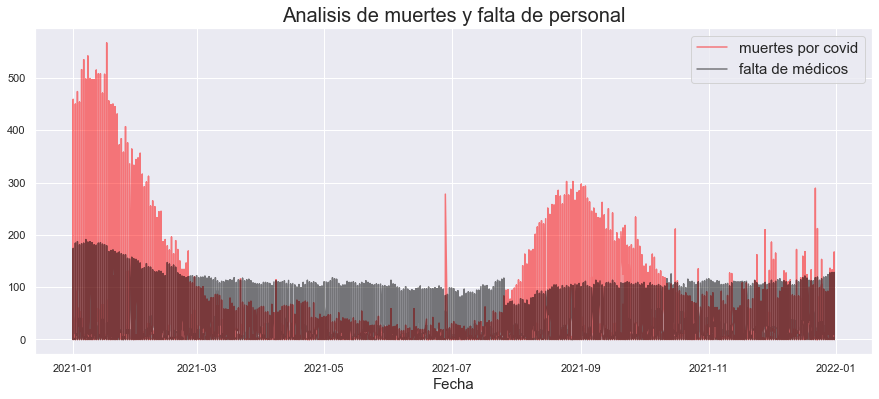

In [83]:
sns.set()
fig = plt.figure()
ax = plt.axes()
y_dt = df7['deaths_covid']
y_stf = df7['critical_staffing_shortage_today_yes']
x = df7['date']

plt.plot(x,y_dt,color='red',alpha=0.5)
plt.plot(x,y_stf,color='black',alpha=0.5)
plt.xlabel('Fecha',fontsize=15)
plt.title('Analisis de muertes y falta de personal',fontsize=20)
plt.gcf().set_size_inches(15, 6)
plt.legend(labels=['muertes por covid','falta de médicos'],fontsize=15)

plt.show()

#  Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.


In [33]:
df8 = results_df[['state',
                     'date',
                     'critical_staffing_shortage_today_yes',
                     'deaths_covid',
                     'staffed_icu_adult_patients_confirmed_covid',
                     'staffed_icu_pediatric_patients_confirmed_covid',
                     'total_staffed_pediatric_icu_beds',
                     'total_staffed_adult_icu_beds']]

df8 = df8[(df8['date'] <= '2022-08-01')]

df8.fillna(0,inplace=True)

df8['staffed_icu_adult_patients_confirmed_covid'] = df8['staffed_icu_adult_patients_confirmed_covid'].astype('int')
df8['staffed_icu_pediatric_patients_confirmed_covid'] = df8['staffed_icu_pediatric_patients_confirmed_covid'].astype('int')
df8['critical_staffing_shortage_today_yes'] = df8['critical_staffing_shortage_today_yes'].astype('int')
df8['deaths_covid'] = df8['deaths_covid'].astype('int')
df8['total_staffed_pediatric_icu_beds'] = df8['total_staffed_pediatric_icu_beds'].astype('int')
df8['total_staffed_adult_icu_beds'] = df8['total_staffed_adult_icu_beds'].astype('int')

df8['total_camas_uci_ocupadas'] = df8['staffed_icu_adult_patients_confirmed_covid'] + df8['staffed_icu_pediatric_patients_confirmed_covid']
df8['total_camas_uci'] = df8['total_staffed_pediatric_icu_beds'] + df8['total_staffed_adult_icu_beds']

df8 = df8.drop('staffed_icu_adult_patients_confirmed_covid',axis=1)
df8 = df8.drop('staffed_icu_pediatric_patients_confirmed_covid',axis=1)


df8['total_camas_uci_ocupadas'] = df8['total_camas_uci_ocupadas'].astype('int')

df8 = round(df8.groupby(pd.PeriodIndex(df8['date'],freq='M'),axis=0).mean(),2)

df8['porcentaje_ocupacion_camas_uci_covid'] = round((df8['total_camas_uci_ocupadas']*100)/df8['total_camas_uci'],2)

df8 = df8.drop('total_staffed_pediatric_icu_beds',axis=1)
df8 = df8.drop('total_staffed_adult_icu_beds',axis=1)
df8 = df8.drop('total_camas_uci_ocupadas',axis=1)
df8 = df8.drop('total_camas_uci',axis=1)

df8 = df8.reset_index()

df8['date'] = df8['date'].astype('datetime64')



In [34]:
df8

,date,critical_staffing_shortage_today_yes,deaths_covid,porcentaje_ocupacion_camas_uci_covid
0,2020-01-01,0.32,0.58,43.67
1,2020-02-01,0.00,0.00,NaN
2,2020-03-01,0.00,0.85,NaN
3,2020-04-01,0.02,21.21,15.77
4,2020-05-01,0.00,33.40,21.08
5,2020-06-01,0.03,11.03,6.38
6,2020-07-01,6.10,11.67,20.14
7,2020-08-01,14.74,19.03,13.80
8,2020-09-01,16.32,9.59,8.98
9,2020-10-01,17.68,10.94,9.80


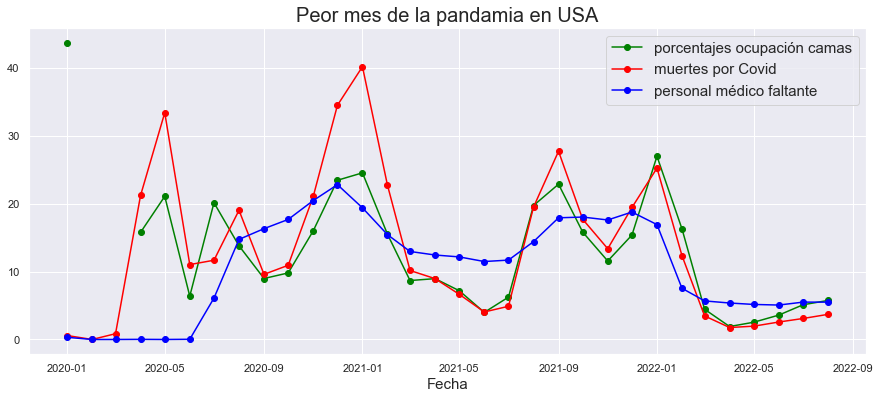

In [86]:
fig = plt.figure()
ax = plt.axes()

y_dt = df8['deaths_covid']
y_stf = df8['critical_staffing_shortage_today_yes']
y_bd = df8['porcentaje_ocupacion_camas_uci_covid']
x = df8['date']

ax.set_xscale('linear')
ax.plot(x, y_bd, marker="o", color = 'green')
ax.plot(x, y_dt, marker="o", color = 'red')
ax.plot(x,y_stf,marker= 'o', color= 'blue')
plt.xlabel('Fecha',fontsize=15)
plt.title('Peor mes de la pandamia en USA',fontsize=20)
plt.gcf().set_size_inches(15, 6)
plt.legend(labels=['porcentajes ocupación camas','muertes por Covid','personal médico faltante'],fontsize=15)

plt.gcf().set_size_inches(15, 6)
plt.show()

# ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

El análisis realizado muestra la deficiencia del sistema de salud ante eventos extraordinarios.
Se recomendaría refordazr el personal sanitario, insumos y equipamiento. No sólo en las en las unidades de terapia intensiva sino también en las salas de atención al paciente en recuperación. La prevensión es un factor determinante frente a una pandemia virósica.
Creación de centros médicos para el diagnóstico precoz de la enfermedad.
